In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import math
sim = Aer.get_backend('aer_simulator')

Quantum Teleportation is a way of sending qbit state from one place to another by using classical bits and Quantum Entanglement.

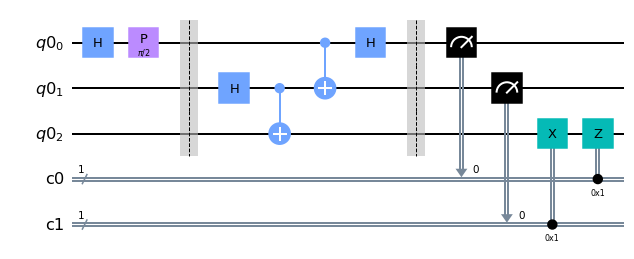

In [2]:
qc = QuantumCircuit(QuantumRegister(3),ClassicalRegister(1),ClassicalRegister(1))
qc.h(0)
qc.p(math.pi/2,0)
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1],[0,1])
qc.x(2).c_if(qc.cregs[1],1)
qc.z(2).c_if(qc.cregs[0],1)
qc.draw('mpl')

The expected state vector is shown in the plot below. The qbit 2 should have this state if the teleportation succeded.

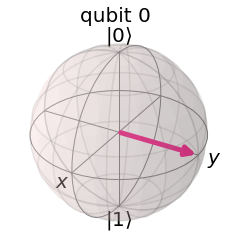

In [3]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.p(math.pi/2,0)
qc1.save_statevector()
s1=execute(qc1,sim,shots=1024).result().get_statevector()
plot_bloch_multivector(s1,figsize=(1.5,1.5))

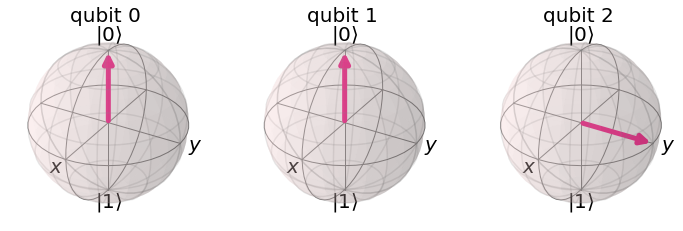

In [4]:
qc.save_statevector()
s=execute(qc,sim,shots=1024).result().get_statevector()
plot_bloch_multivector(s,figsize=(1.5,1.5))